In [2]:
import numpy as np
embeddings_file = "/home/rohan/Documents/projects/interspecies_money/data/crops_and_embeddings/kwitonda_portraits/embeddings/embeddings.npy"
iids_file = "/home/rohan/Documents/projects/interspecies_money/data/crops_and_embeddings/kwitonda_portraits/embeddings/individual_ids.npy"

embeddings = np.load(embeddings_file)
individual_ids = np.load(iids_file)

In [3]:
embeddings_file_db = "/home/rohan/Documents/projects/interspecies_money/data/crops_and_embeddings/kwitonda_database/embeddings/embeddings.npy"
img_fns_file_db = "/home/rohan/Documents/projects/interspecies_money/data/crops_and_embeddings/kwitonda_database/embeddings/individual_ids.npy"

embeddings_db = np.load(embeddings_file_db)
ids_db = np.load(img_fns_file_db)

In [4]:
from sklearn import neighbors
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, accuracy_score, classification_report, top_k_accuracy_score

def compute_prediction_metrics(y_true, y_pred, y_score, all_labels)-> dict:
    print(len(y_score[0]))
    print(len(y_score))
    if len(y_score[0]) == 2:
        y_score = [all_labels[score.index(min(score))] for score in y_score]

    metrics = {   
        "recall": recall_score(y_true, y_pred, average='micro'),
        "precision": precision_score(y_true, y_pred, average='micro'),
        "f1Score": f1_score(y_true, y_pred, average='micro'),
        "accuracy": accuracy_score(y_true, y_pred),
        "top_5_accuracy": top_k_accuracy_score(y_true, y_score, labels=all_labels, k=5),
        "consusion_matrix": confusion_matrix(y_true, y_pred),
        "recall_per_class": recall_score(y_true, y_pred, average=None),
        "precision_per_class": precision_score(y_true, y_pred, average=None),
        "f1Score_per_class": f1_score(y_true, y_pred, average=None),
        "individual_results": classification_report(y_true, y_pred, output_dict=True)
    }

    return metrics



knn_classifier = neighbors.KNeighborsClassifier()
knn_classifier.fit(embeddings_db, ids_db)
print(embeddings_db.shape)
print(embeddings.shape)

predicted_labels = []
predicted_scores = []
true_labels = []

for embedding, iid in zip(embeddings, individual_ids):
    if iid not in ids_db:
        continue
    embedding = np.expand_dims(embedding, 0)
    prediction = knn_classifier.predict(embedding)
    neighbour_scores = knn_classifier.predict_proba(embedding)[0]
    # print(len(neighbour_scores))
    # print(neighbour_scores.shape)
    predicted_labels.append(prediction)
    predicted_scores.append(neighbour_scores)
    true_labels.append(iid)
    


(53, 256)
(1731, 256)


In [5]:
print(set(individual_ids))
print(set(ids_db))
print([pl[0] for pl in predicted_labels])
print(set([pl[0] for pl in predicted_labels]))

print((set(individual_ids).union(set(ids_db))).difference(set([pl[0] for pl in predicted_labels])))

print(len(predicted_scores[0]))
print(predicted_scores[0])
    
# all_iids = individual_ids
# all_iids.extend(ids_db.tolist())
# all_iids.extend([pl[0] for pl in predicted_labels])
unique_ids = list(set(ids_db.tolist()))
unique_ids.sort()

num_images_correct = sum([1 for idx in range(0, len(true_labels)) if true_labels[idx] == predicted_labels[idx]])
print(f"correctly classified {num_images_correct}/{len(true_labels)} images")
metrics = compute_prediction_metrics(true_labels, predicted_labels, predicted_scores, unique_ids)
print(metrics)

{'KHA', 'GAH', 'KAT', 'SUL', 'KAV', 'REM', 'NTI', 'CYU', 'NOT VISIBLE', 'MBI', 'ICM', 'IKR', 'WIG', 'INO', 'ELEPHANT', 'NAN', 'RWU', 'NRJ', 'KBU', 'IZO'}
{'KHA', 'IKP', 'KIG', 'RAK', 'GAH', 'URW', 'KIB', 'LIS', 'UBG', 'WAK', 'OKA', 'KAT', 'SUL', 'KAV', 'REM', 'HEM', 'IRZ', 'PAK', 'NTI', 'MGE', 'NYI', 'CYU', 'MBI', 'NDM', 'NCH', 'INY', 'ICM', 'IKR', 'WIG', 'IBE', 'INO', 'RWU', 'NDT', 'NRJ', 'AF', 'ABO', 'KBU', 'URO', 'IFA'}
['ABO', 'KAT', 'ABO', 'AF', 'IKR', 'IBE', 'KAV', 'GAH', 'INY', 'KAV', 'AF', 'IBE', 'AF', 'LIS', 'IBE', 'IKR', 'IKR', 'KAV', 'CYU', 'ABO', 'ICM', 'ABO', 'INO', 'ICM', 'AF', 'INY', 'KAV', 'INO', 'KBU', 'IKR', 'ABO', 'INY', 'ICM', 'ICM', 'IBE', 'ABO', 'INO', 'KBU', 'IKR', 'ABO', 'ABO', 'SUL', 'ABO', 'ABO', 'ABO', 'KAT', 'SUL', 'CYU', 'ICM', 'IKR', 'INO', 'ABO', 'KIG', 'CYU', 'ABO', 'IKR', 'ICM', 'AF', 'IBE', 'AF', 'ABO', 'NDT', 'SUL', 'CYU', 'IBE', 'KAV', 'AF', 'ICM', 'CYU', 'KAV', 'IKR', 'ICM', 'SUL', 'ABO', 'ICM', 'ABO', 'REM', 'INO', 'ICM', 'INO', 'IKR', 'AF', 'AF', 

/home/rohan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rohan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rohan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rohan/.local/lib/python3.10/site-packages/sklearn/metrics/_classific

['KAV' 'NRJ' 'CYU' ... 'MBI' 'KAT' 'MBI']


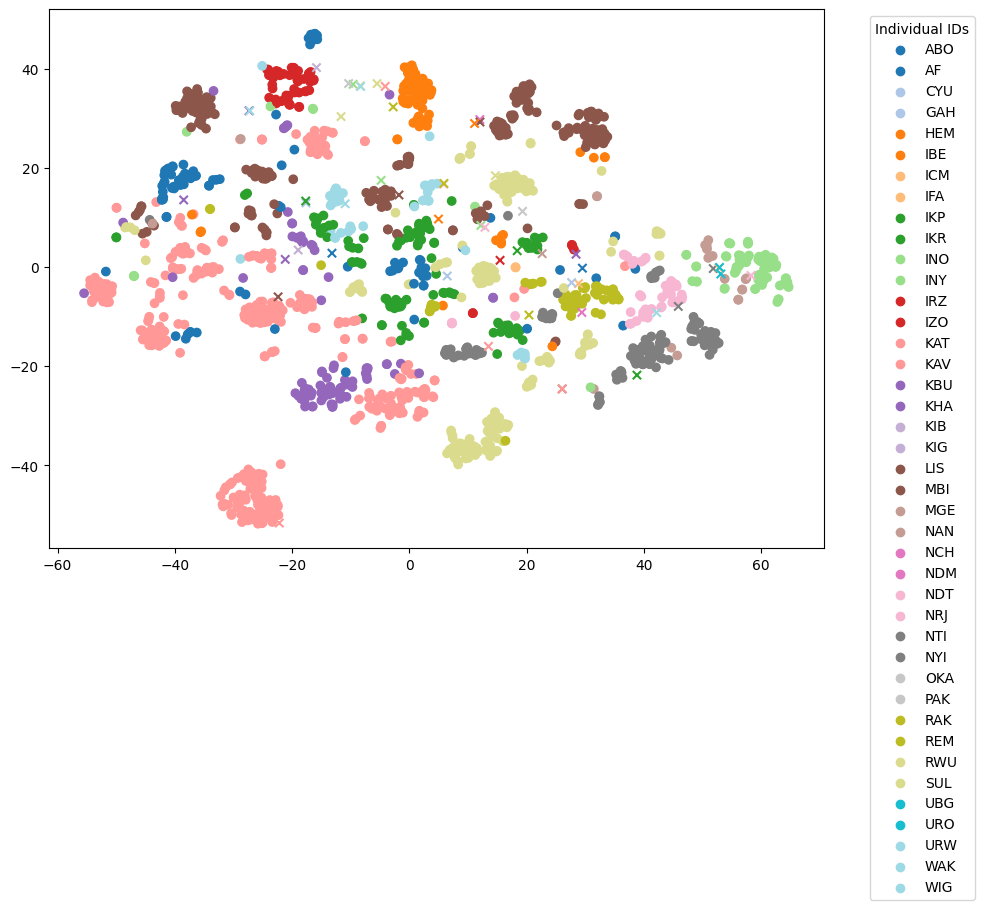

In [6]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
all_embeddings = np.vstack((embeddings, embeddings_db))
embeddings_2d = tsne.fit_transform(all_embeddings)


# Split the transformed embeddings back into original and additional sets
embeddings_2d_original = embeddings_2d[:len(embeddings)]
embeddings_2d_additional = embeddings_2d[len(embeddings):]

exclude = ["ELEPHANT", "NOT VISIBLE"]
print(individual_ids)
mask = np.array([iid not in exclude for iid in individual_ids])
embeddings_2d_original = embeddings_2d_original[mask]
individual_ids_original = individual_ids
individual_ids = [iid for i, iid in enumerate(individual_ids) if mask[i]]

additional_individual_ids = ids_db.tolist()

# Unique individual IDs
unique_individual_ids = sorted(set(individual_ids + additional_individual_ids))

# Create the scatter plot
plt.figure(figsize=(10, 7))  # Adjust the figure size if needed

# Color map for distinct colors
colors = plt.cm.get_cmap("tab20", len(unique_individual_ids))
individual_ids_num_map = {ind: i for i, ind in enumerate(unique_individual_ids)}
c_original = [individual_ids_num_map[ind] for ind in individual_ids]
c_additional = [individual_ids_num_map[ind] for ind in additional_individual_ids]

# Plot original embeddings
scatter_original = plt.scatter(embeddings_2d_original[:, 0], embeddings_2d_original[:, 1], 
                               c=c_original, cmap=colors, marker='o')

# Plot additional embeddings with a different marker
scatter_additional = plt.scatter(embeddings_2d_additional[:, 0], embeddings_2d_additional[:, 1], 
                                 c=c_additional, cmap=colors, marker='x')

# Create a legend with the individual IDs
legend_labels = {ind: colors(individual_ids_num_map[ind]) for ind in unique_individual_ids}
for label, color in legend_labels.items():
    plt.scatter([], [], color=color, label=label)

# Position the legend outside the plot
plt.legend(title="Individual IDs", bbox_to_anchor=(1.05, 1), loc='upper left')